In [2]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
features = utils.load('data/fma_metadata/DBMERGEfeatures.csv')
tracks = utils.load('fma_metadata/tracks.csv')

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from scikitplot.metrics import plot_roc

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [7]:
features_m = features[tracks['set','subset']<='medium']
tracks_m = tracks[tracks['set','subset']<='medium']

In [8]:
corr_matrix = features_m.corr().abs()

In [9]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [10]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

In [11]:
features_m.drop(to_drop, axis=1, inplace=True)

C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
features_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Columns: 191 entries, ('chroma_cens', 'kurtosis', '01') to ('zcr', 'kurtosis', '01')
dtypes: float64(191)
memory usage: 36.6 MB


NameError: name 'pd' is not defined

In [13]:
features_m['genre'] = tracks['track','genre_top']
features_m

<ipython-input-13-fc97120952a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_m['genre'] = tracks['track','genre_top']


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
134           0.918445  0.674147  0.577818  1.281117  0.933746  0.078177   
...                ...       ...       ...       ...       ...       ...   
155297       -0.007668  0.104604 -0.511487  0.857308  0.266202 -0.355186   
155298       -0.956019 -0.961210 -0.447053 -0.689531 -0.633071 -0.430116   
155306        0.644815 -0.879404 -1.149232 -0.655986 -0.848881 -0.672240   
155307       -0.446937  1.235004 -0.250855 -0.612224 -1.197387 -1.118230   
155314       -0.121936 -0.348523 -0.555810 -0.607600 -0.823013 -0.369621   

feature                                             ...   tonnetz            \
statistics                                          ...       min      skew   
number            07        08        09        10  ...        06        01   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ... -0.089286  0.752462   
3           1.366848  1.054094  0.108103  0.619185  ... -0.055667  0.265541   
5          -0.923192 -0.927232  0.666617  1.038546  ... -0.146136  1.212025   
10          1.770694  1.604566  0.521217  1.982386  ... -0.029836 -0.135219   
134         1.199204 -0.175223  0.925482  1.438509  ... -0.053569  0.927807   
...              ...       ...       ...       ...  ...       ...       ...   
155297     -0.273640 -0.324727 -0.106368 -1.146157  ... -0.078358 -0.325269   
155298     -0.031147 -0.758652 -1.093452  0.083694  ... -0.078705 -1.322760   
155306      0.193149  0.069103 -0.179058 -0.713318  ... -0.087523  0.472639   
155307      0.716520 -0.878211 -0.637801  0.188355  ... -0.124942  0.124331   
155314     -0.573967  0.554874 -0.905412 -1.004594  ... -0.067878 -0.011633   

feature                                                                 \
statistics                                                         std   
number            02        03        04        05        06        01   
track_id                                                                 
2           0.262607  0.200944  0.593595 -0.177665 -1.424201  0.019809   
3          -0.131471  0.171930 -0.990710  0.574556  0.556494  0.026316   
5           0.218381 -0.419971 -0.014541 -0.199314 -0.925733  0.025550   
10         -0.275780  0.015767 -1.094873  1.164041  0.246746  0.021413   
134        -0.947771  0.143864 -0.529867  0.162188  0.063846  0.024258   
...              ...       ...       ...       ...       ...       ...   
155297      0.186387  0.149134  0.609729  0.089709 -0.265698  0.042092   
155298      0.248748 -0.312195 -0.291032 -0.230531  0.023484  0.038473   
155306     -0.132212  0.109551  0.157505  0.015775 -0.168365  0.039904   
155307     -0.120548  0.440403 -0.336394 -0.313871  0.431035  0.035253   
155314      0.034609  0.247306 -0.090929  0.051108 -0.191202  0.027354   

feature           zcr         genre  
statistics   kurtosis                
number             01                
track_id                             
2            5.758890       Hip-Hop  
3            2.824694       Hip-Hop  
5            6.808415       Hip-Hop  
10          21.434212           Pop  
134          4.731087       Hip-Hop  
...               ...           ...  
155297      70.604774  Instrumental  
155298      45.445824          Folk  
155306      17.076239          Folk  
155307       6.458911  Experimental  
155314       8.916731         

In [14]:
le = LabelEncoder()
features_m['genre'] = le.fit_transform(features_m['genre'])
features_m['genre']

<ipython-input-14-288eb629b543>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_m['genre'] = le.fit_transform(features_m['genre'])


track_id
2          7
3          7
5          7
10        12
134        7
          ..
155297     8
155298     6
155306     6
155307     5
155314    13
Name: genre, Length: 25000, dtype: int32

In [15]:
le.classes_

array(['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic',
       'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International',
       'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken'],
      dtype=object)

In [16]:
attributes = [col for col in features_m.columns if col != ('genre', '', '')]
attributes

[('chroma_cens', 'kurtosis', '01'),
 ('chroma_cens', 'kurtosis', '02'),
 ('chroma_cens', 'kurtosis', '03'),
 ('chroma_cens', 'kurtosis', '04'),
 ('chroma_cens', 'kurtosis', '05'),
 ('chroma_cens', 'kurtosis', '06'),
 ('chroma_cens', 'kurtosis', '07'),
 ('chroma_cens', 'kurtosis', '08'),
 ('chroma_cens', 'kurtosis', '09'),
 ('chroma_cens', 'kurtosis', '10'),
 ('chroma_cens', 'kurtosis', '11'),
 ('chroma_cens', 'kurtosis', '12'),
 ('chroma_cens', 'max', '01'),
 ('chroma_cens', 'max', '02'),
 ('chroma_cens', 'max', '03'),
 ('chroma_cens', 'max', '04'),
 ('chroma_cens', 'max', '05'),
 ('chroma_cens', 'max', '06'),
 ('chroma_cens', 'max', '07'),
 ('chroma_cens', 'max', '08'),
 ('chroma_cens', 'max', '09'),
 ('chroma_cens', 'max', '10'),
 ('chroma_cens', 'max', '11'),
 ('chroma_cens', 'max', '12'),
 ('chroma_cens', 'mean', '01'),
 ('chroma_cens', 'mean', '02'),
 ('chroma_cens', 'mean', '04'),
 ('chroma_cens', 'mean', '05'),
 ('chroma_cens', 'mean', '07'),
 ('chroma_cens', 'mean', '09'),
 ('c

In [17]:
X = features_m[attributes].values
y = features_m[('genre', '', '')]

In [18]:
sel = SelectKBest(k=20)
X_sel = sel.fit_transform(X, y)

In [19]:
feat_importance= dict(zip(features_m.columns, sel.scores_))

In [20]:
sorted(feat_importance.items(), key=lambda item: item[1], reverse=True)[:20]

[(('mfcc', 'max', '04'), 858.7115328485435),
 (('mfcc', 'max', '01'), 768.1876850328108),
 (('mfcc', 'max', '03'), 416.79310438632905),
 (('mfcc', 'max', '07'), 384.3081626020349),
 (('spectral_bandwidth', 'kurtosis', '01'), 357.20514552817275),
 (('mfcc', 'mean', '02'), 340.05550305373316),
 (('chroma_stft', 'mean', '01'), 290.38052066427),
 (('mfcc', 'std', '04'), 281.83990740342057),
 (('mfcc', 'std', '02'), 280.3960742957319),
 (('spectral_contrast', 'max', '04'), 267.937144552194),
 (('mfcc', 'min', '04'), 265.648429894638),
 (('mfcc', 'std', '01'), 258.5105522377112),
 (('mfcc', 'skew', '04'), 247.34800125416925),
 (('mfcc', 'min', '05'), 247.15955683445324),
 (('spectral_contrast', 'max', '03'), 240.3688867546301),
 (('mfcc', 'min', '02'), 234.0722959609404),
 (('mfcc', 'max', '11'), 221.97834966485144),
 (('tonnetz', 'std', '01'), 218.3906700859561),
 (('spectral_contrast', 'min', '02'), 216.42335587533182),
 (('mfcc', 'min', '11'), 208.4283609975846)]

In [7]:
features = pd.read_csv('data/fma_metadata/df_senzaOutliers.csv',index_col=[0], header=[0,1,2])
features

feature    chroma_stft       mfcc                                    \
statistics        mean        max                                     
number              01         01         03          04         07   
track_id                                                              
2             0.696063  28.657707  52.424423  103.289833  37.843021   
3             0.449602  29.380682  76.742714  137.245010  55.662521   
5             0.481160 -40.500740  50.373932  112.312531  29.266182   
10            0.388109  20.196968  60.412815   78.466721  21.597277   
134           0.438062 -41.723225  58.687328  125.922821  37.450359   
...                ...        ...        ...         ...        ...   
155297        0.408626   3.826046  94.208336   48.085751  26.723190   
155298        0.439034 -72.790154  81.013275  124.569000  29.571426   
155306        0.369401  -7.814734  88.024063  116.180260  29.388819   
155307        0.357939 -13.889938  62.219879   93.028778  41.311356   
155314        0.551894 -15.305521  32.737503   95.054657  25.620636   

feature                                                                ...  \
statistics                   mean           min                        ...   
number             11          02            02         04         05  ...   
track_id                                                               ...   
2           27.737400  116.696678 -1.421085e-14 -51.569004 -97.879890  ...   
3           26.740063  120.158501 -1.851665e+01 -12.548506 -87.048355  ...   
5           27.197964  132.215073 -6.228398e+01 -24.319845 -74.060310  ...   
10          24.780317  157.040085  5.151435e-14 -50.578659 -45.113949  ...   
134         36.486378  125.521309 -9.427860e-01 -90.334747 -67.671829  ...   
...               ...         ...           ...        ...        ...  ...   
155297      19.866936  163.954620 -1.776357e-14 -29.221125 -28.104187  ...   
155298      38.472843  160.770218 -7.993606e-14  -7.314378 -69.236115  ...   
155306      47.185654  177.614151  5.329071e-15 -49.451691 -70.841232  ...   
155307      33.690544  124.228142 -5.892177e+00 -50.547176 -99.119080  ...   
155314      34.402496  166.692734 -2.464827e-01 -55.172737 -55.477066  ...   

feature                          spectral_bandwidth spectral_contrast  \
statistics        std                      kurtosis               max   
number             02         04                 01                03   
track_id                                                                
2           38.569584  20.767921           3.874384         39.333603   
3           41.191982  22.025253           2.383340         42.141411   
5           39.367599  24.319347           0.895442         39.017235   
10          44.409843  14.013119           0.437628         45.410881   
134         47.266518  36.841534           0.372903         41.526760   
...               ...        ...                ...               ...   
155297      30.287067  12.060067          20.706787         40.720093   
155298      39.359367  18.604885           5.868375         39.627396   
155306      40.537926  28.671246           4.375974         40.628235   
155307      35.382370  22.123117          -0.383395         48.715477   
155314      26.786989  22.369673           0.011010         39.460281   

feature                           tonnetz metadata                              
statistics                  min       std      set         track                
number             04        02        01   subset     genre_top genre_top_Cat  
track_id                                                                        
2           31.513493  2.296826  0.019809    small       Hip-Hop             7  
3           31.473713  0.652681  0.026316   medium       Hip-Hop             7  
5           33.707951  2.314010  0.025550    small       Hip-Hop             7  
10          28.711344  4.415900  0.021413    small           Pop            12  
134         32.2243

In [21]:
scaler= StandardScaler()
X= scaler.fit_transform(X_sel)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [23]:
X_train.shape

(17500, 20)

In [24]:
X_test.shape

(7500, 20)

## KNN

In [112]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [113]:
param_list={'n_neighbors':list(np.arange(5,20,1)),
            'weights':['distance','uniform'],
            'p':[1,2]
            }

In [114]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_list, scoring='f1_macro',
                                   n_iter=40, cv=StratifiedKFold(5))

In [115]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=40,
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19],
                                        'p': [1, 2],
                                        'weights': ['distance', 'uniform']},
                   scoring='f1_macro')

In [116]:
clf = random_search.best_estimator_

In [117]:
random_search.cv_results_

{'mean_fit_time': array([0.01006174, 0.00656261, 0.00744033, 0.00558629, 0.00627651,
        0.00654955, 0.00732102, 0.00901484, 0.00556269, 0.00330982,
        0.00823598, 0.0024982 , 0.01163564, 0.00683055, 0.00683236,
        0.01006045, 0.00408235, 0.00823703, 0.00633483, 0.00829878,
        0.00615792, 0.00660706, 0.00616231, 0.00739079, 0.00419431,
        0.00512071, 0.00782475, 0.00616159, 0.00516191, 0.0071475 ,
        0.00617452, 0.00788417, 0.00430202, 0.0036572 , 0.00409584,
        0.003685  , 0.0020546 , 0.00173774, 0.00040803, 0.00207009]),
 'std_fit_time': array([0.00298253, 0.00386478, 0.00536336, 0.00380999, 0.00298961,
        0.00356195, 0.00289538, 0.00121337, 0.0038344 , 0.00355262,
        0.00311687, 0.00399316, 0.00301744, 0.00476185, 0.00547471,
        0.00042934, 0.00427549, 0.00411851, 0.00356065, 0.00502461,
        0.00400372, 0.00329459, 0.00503158, 0.00409505, 0.00440658,
        0.00420174, 0.00270695, 0.00423277, 0.0043722 , 0.00382307,
        0.004

In [118]:
report(random_search.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.356 (std: 0.007)
Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 6}

Model with rank: 2
Mean validation score: 0.355 (std: 0.007)
Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 7}

Model with rank: 3
Mean validation score: 0.352 (std: 0.005)
Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5}

Model with rank: 4
Mean validation score: 0.352 (std: 0.006)
Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 8}

Model with rank: 5
Mean validation score: 0.347 (std: 0.006)
Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 11}



In [25]:
clf = KNeighborsClassifier(weights='distance', p=1, n_neighbors=6)

In [26]:
clf = clf.fit(X_train, y_train)

In [27]:
y_pred_test = clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred_test, target_names=le.inverse_transform(np.arange(0,16))))

                     precision    recall  f1-score   support

              Blues       0.40      0.09      0.15        22
          Classical       0.50      0.70      0.58       186
            Country       0.33      0.15      0.21        54
     Easy Listening       0.00      0.00      0.00         6
         Electronic       0.60      0.61      0.60      1894
       Experimental       0.37      0.13      0.19       675
               Folk       0.48      0.50      0.49       456
            Hip-Hop       0.49      0.48      0.48       660
       Instrumental       0.40      0.34      0.37       405
      International       0.44      0.31      0.36       305
               Jazz       0.35      0.17      0.22       115
Old-Time / Historic       0.85      0.97      0.91       153
                Pop       0.21      0.08      0.11       356
               Rock       0.58      0.81      0.68      2131
           Soul-RnB       0.12      0.02      0.04        46
             Spoken    

C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
import warnings
warnings.filterwarnings("ignore")
scores = cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(5),scoring='recall_macro')
print('Recall-macro: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(5),scoring='precision_macro')
print('Precision-macro: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(5),scoring='f1_macro')
print('F1-macro: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(5),scoring='accuracy')
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Recall-macro: 0.3525 (+/- 0.01)
Precision-macro: 0.3952 (+/- 0.04)
F1-macro: 0.3558 (+/- 0.01)
Accuracy: 0.5468 (+/- 0.01)


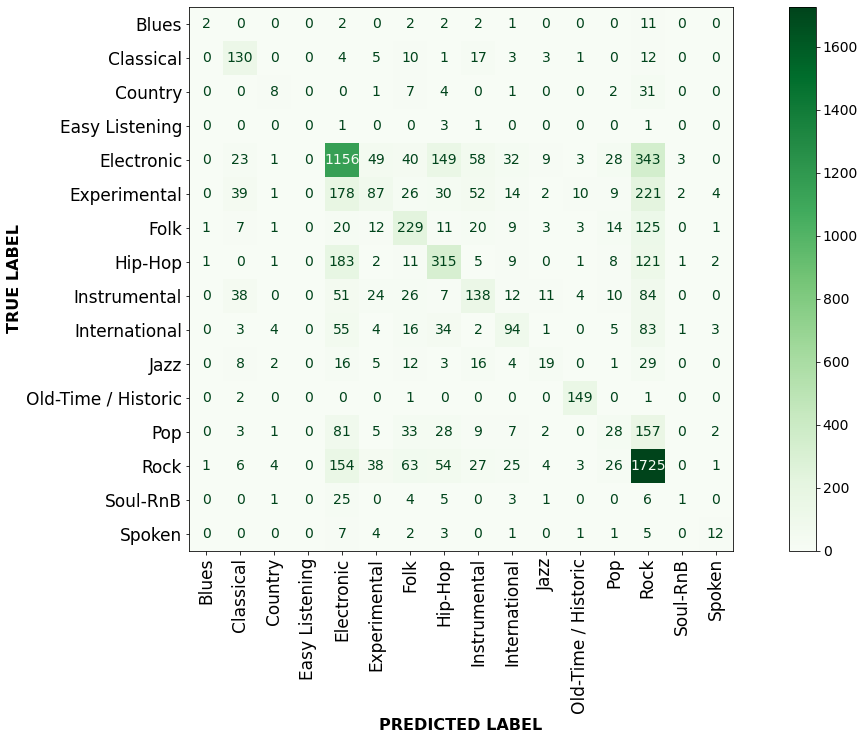

In [30]:
plt.rcParams.update({'font.size': 14})
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=le.classes_,
                                 cmap=plt.cm.Greens)
plt.ylabel('TRUE LABEL', fontsize=16, fontweight='bold')
plt.yticks(fontsize=17)
plt.xticks(fontsize=17 ,rotation=90)
plt.xlabel('PREDICTED LABEL', fontsize=16, fontweight='bold')
plt.grid(False)
plt.show()

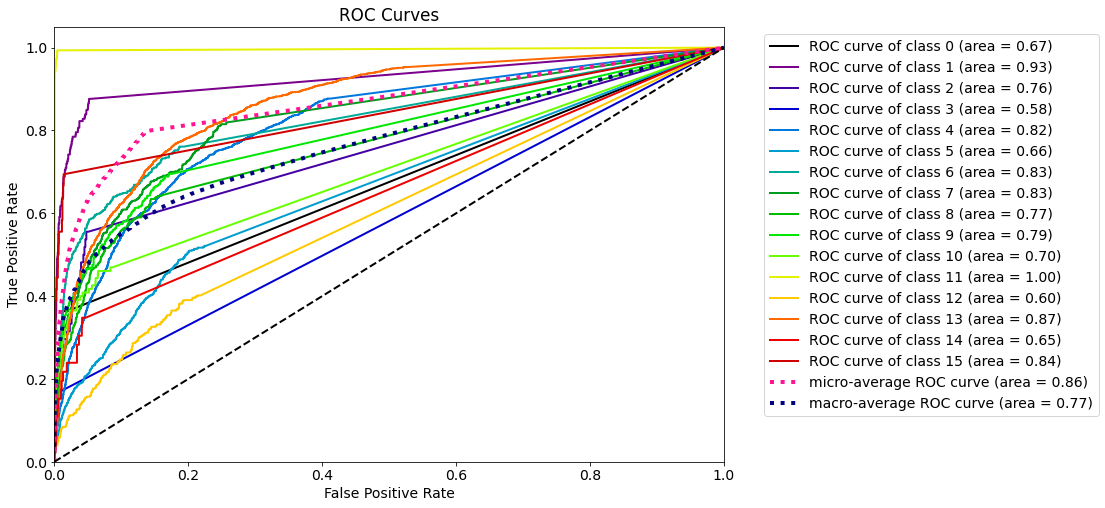

In [39]:
y_score=clf.predict_proba(X_test)
plt.rcParams['figure.figsize'] = (12, 8)
plot_roc(y_test, y_score)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()